<a href="https://www.kaggle.com/code/adarshdeep15/fake-news-detection?scriptVersionId=130476198" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
# importing Libraries

import nltk
nltk.download('punkt')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
'''The code above imports the necessary libraries and modules required for data analysis, text preprocessing, visualization, and machine learning.'''

'The code above imports the necessary libraries and modules required for data analysis, text preprocessing, visualization, and machine learning.'

In [4]:
# Load the dataset

df_true = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")
df_fake = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")

In [5]:
'''This code loads the true and fake news datasets from CSV files. The datasets contain information about news articles, including the title, text, subject, and whether they are true or fake.'''

'This code loads the true and fake news datasets from CSV files. The datasets contain information about news articles, including the title, text, subject, and whether they are true or fake.'

In [6]:
# Add target column to indicate real or fake news 

df_true['target'] = 1
df_fake['target'] = 0

# Concatenate real and fake news datasets


df = pd.concat([df_true, df_fake]).reset_index(drop = True)

# Combine title and text into a single column
df['original'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,date,target,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...


In [7]:
'''Here, a target column is added to both the true and fake news datasets. 
The target column is set to 1 for true news and 0 for fake news. This column will be used as the target variable for classification
The code concatenates the true and fake news datasets into a single dataframe called df. The reset_index function is used to reset the index of the combined dataframe.
In this code, a new column called 'original' is created by combining the title and text columns of the dataframe. This column will contain the concatenated text of the
title and article. The resulting dataframe is then displayed.'''

"Here, a target column is added to both the true and fake news datasets. \nThe target column is set to 1 for true news and 0 for fake news. This column will be used as the target variable for classification\nThe code concatenates the true and fake news datasets into a single dataframe called df. The reset_index function is used to reset the index of the combined dataframe.\nIn this code, a new column called 'original' is created by combining the title and text columns of the dataframe. This column will contain the concatenated text of the\ntitle and article. The resulting dataframe is then displayed."

In [8]:
df.isnull().sum()

title       0
text        0
subject     0
date        0
target      0
original    0
dtype: int64

In [9]:
# Function to preprocess text

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.update(['from', 'subject', 're', 'edu', 'use'])

def preprocess(text):
    result = []
    tokens = nltk.word_tokenize(text.lower())
    for token in tokens:
        if token not in stop_words and len(token) > 2:
            result.append(token)
    return result


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
'''This code defines a function called preprocess for text preprocessing. The function removes stopwords, converts text to lowercase, 
and filters out tokens with a length less than or equal to 2. The stopwords are downloaded from NLTK and additional stopwords are added to the set.'''

'This code defines a function called preprocess for text preprocessing. The function removes stopwords, converts text to lowercase, \nand filters out tokens with a length less than or equal to 2. The stopwords are downloaded from NLTK and additional stopwords are added to the set.'

In [11]:
df.subject=df.subject.replace({'politics':'PoliticsNews','politicsNews':'PoliticsNews'})

In [12]:
'''Here, the subject column values are replaced to ensure consistency. 'politics' and 'politicsNews' are both replaced with 'PoliticsNews'.'''

"Here, the subject column values are replaced to ensure consistency. 'politics' and 'politicsNews' are both replaced with 'PoliticsNews'."

<AxesSubplot:xlabel='target', ylabel='Counts'>

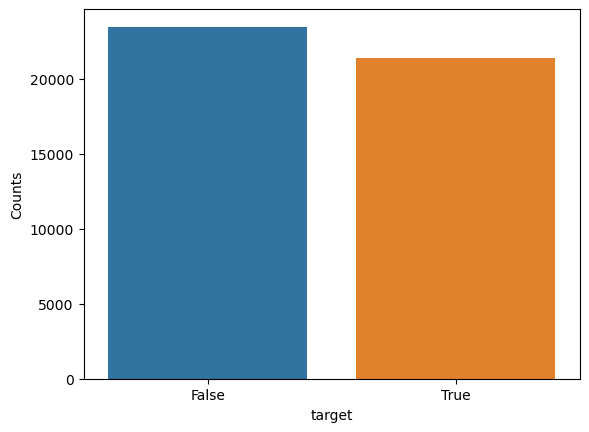

In [13]:
sub_tf_df = pd.DataFrame(df['target'].value_counts()).reset_index()
sub_tf_df.columns = ['target', 'Counts']
sub_tf_df['target'] = sub_tf_df['target'].replace({0: 'False', 1: 'True'})

sns.barplot(x='target', y='Counts', data=sub_tf_df)

In [14]:
'''This code creates a bar plot to visualize the distribution of true and fake news in the dataset. The dataframe sub_tf_df is created to store the count of each target value. 
The value_counts() function counts the occurrences of each target value, and the resulting dataframe is plotted using sns.barplot().'''

'This code creates a bar plot to visualize the distribution of true and fake news in the dataset. The dataframe sub_tf_df is created to store the count of each target value. \nThe value_counts() function counts the occurrences of each target value, and the resulting dataframe is plotted using sns.barplot().'

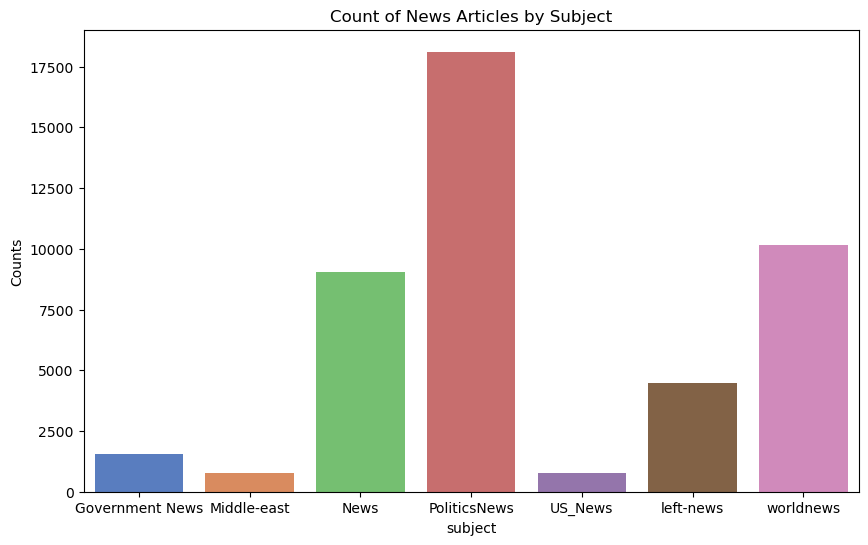

In [15]:
sub_check = pd.DataFrame(df.groupby('subject')['title'].count()).reset_index()
sub_check.columns = ['subject', 'Counts']

plt.figure(figsize=(10, 6))
sns.barplot(x='subject', y='Counts', data=sub_check, palette='muted')
plt.title('Count of News Articles by Subject')
plt.show()

In [16]:
'''This code creates a bar plot to visualize the count of news articles by subject.
The groupby() function groups the dataframe by subject and counts the number of titles for each subject. The resulting dataframe sub_check is plotted using sns.barplot().'''

'This code creates a bar plot to visualize the count of news articles by subject.\nThe groupby() function groups the dataframe by subject and counts the number of titles for each subject. The resulting dataframe sub_check is plotted using sns.barplot().'

In [17]:
# Preprocess title and create a cleaned joined title column

df['clean_title'] = df['title'].apply(preprocess)
df['clean_title'][0]

['u.s.', 'budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script']

In [18]:
df['clean_joined_title']=df['clean_title'].apply(lambda x:" ".join(x))

In [19]:
'''In this code, the title column is preprocessed using the preprocess function. The resulting cleaned tokens are stored in a new column called 'clean_title'. 
Then, the cleaned tokens are joined back into a single string separated byspaces and stored in a new column called 'clean_joined_title'. The cleaned joined title of the first row is displayed.'''

"In this code, the title column is preprocessed using the preprocess function. The resulting cleaned tokens are stored in a new column called 'clean_title'. \nThen, the cleaned tokens are joined back into a single string separated byspaces and stored in a new column called 'clean_joined_title'. The cleaned joined title of the first row is displayed."

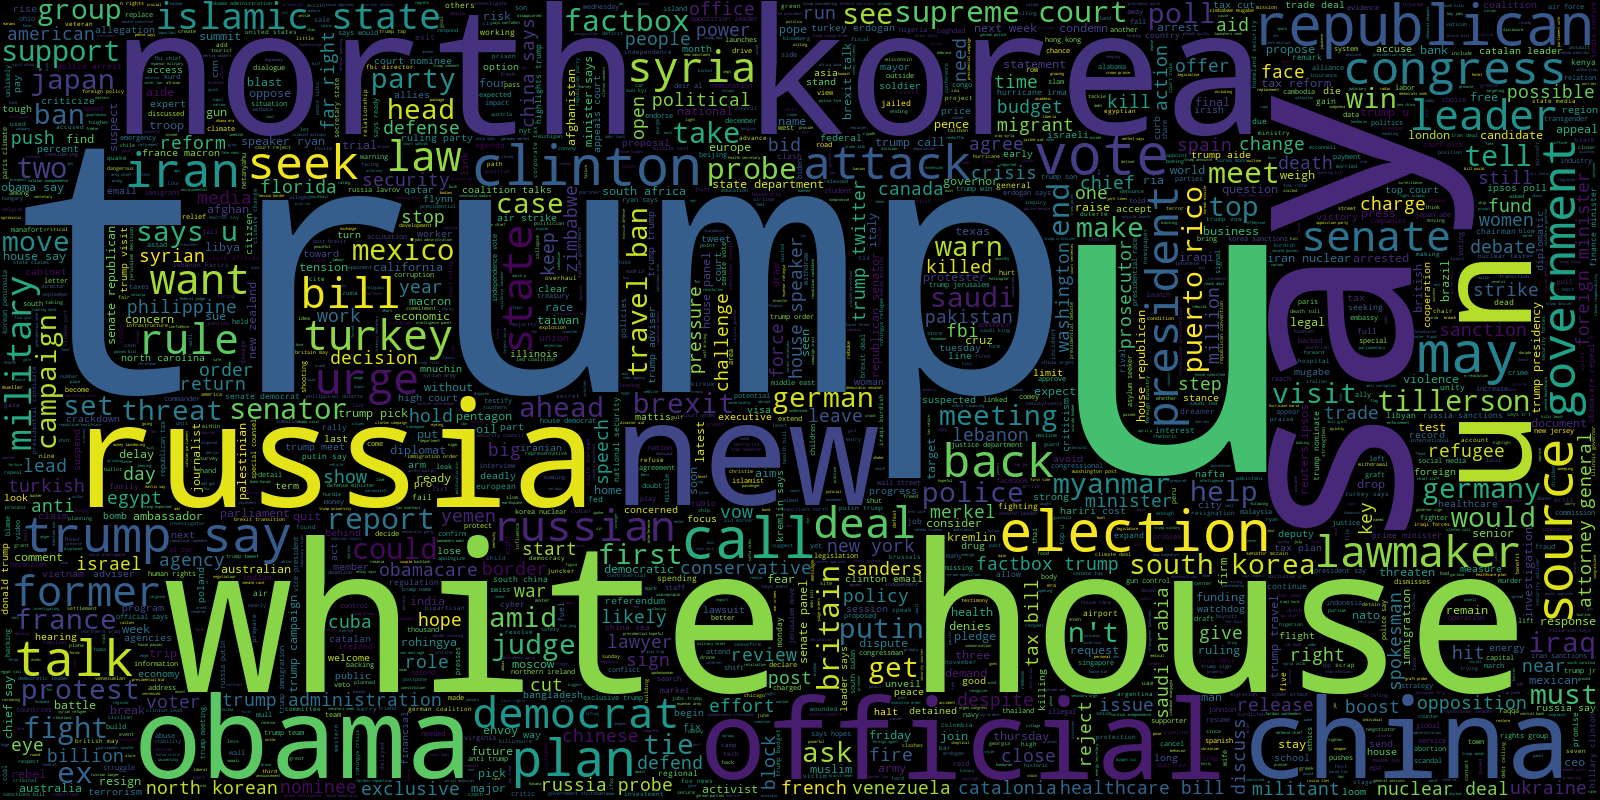

<Figure size 2000x2000 with 0 Axes>

In [20]:
plt.figure(figsize=(20, 20))
WordCloud(max_words=2000, width=1600, height=800, stopwords=stop_words).generate(" ".join(df[df.target == 1].clean_joined_title)).to_image()


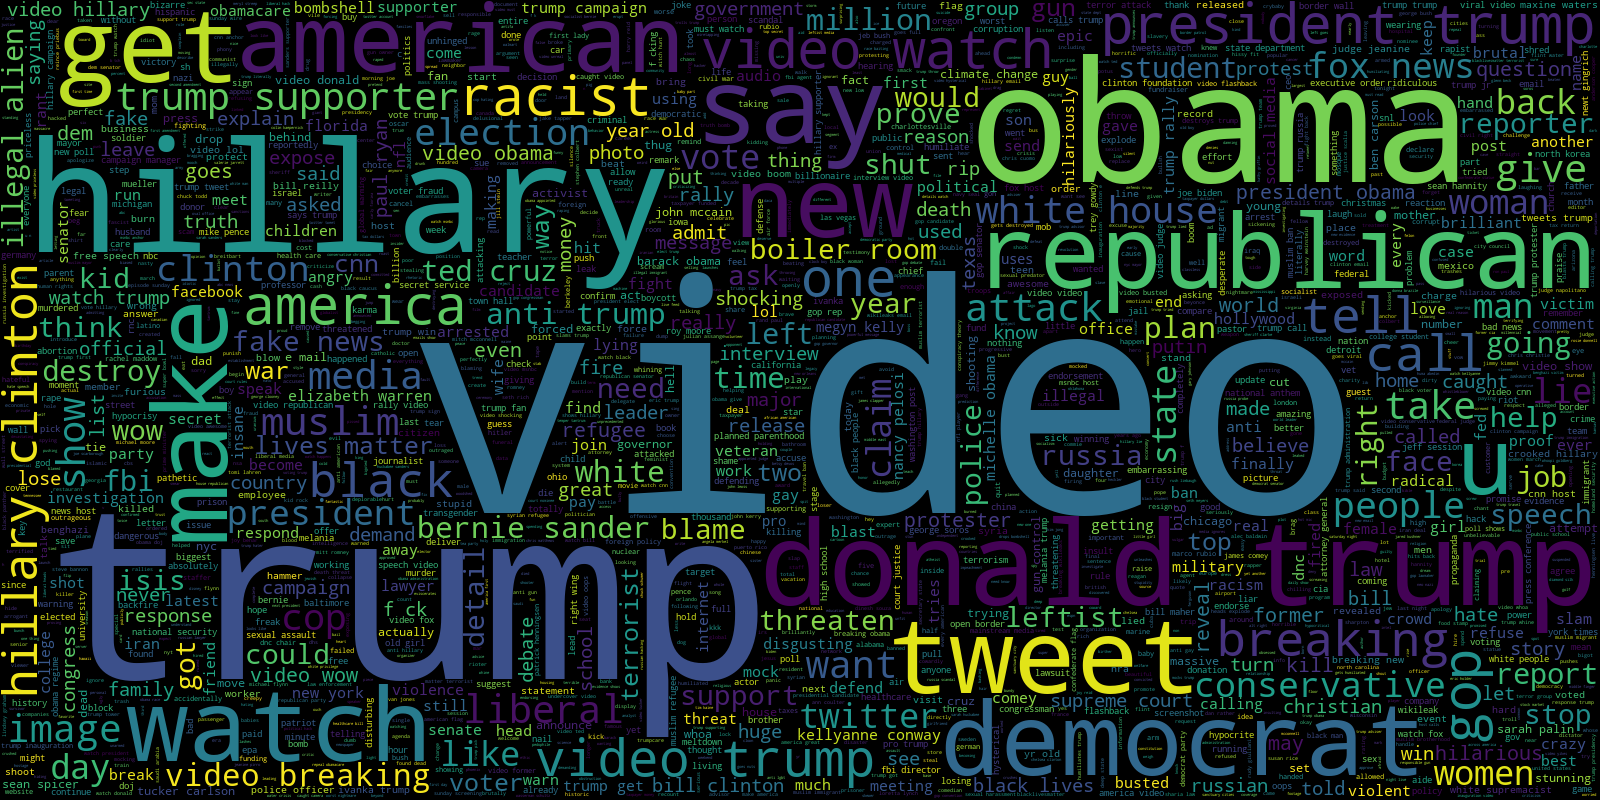

<Figure size 2000x2000 with 0 Axes>

In [21]:
plt.figure(figsize=(20, 20))
WordCloud(max_words=2000, width=1600, height=800, stopwords=stop_words).generate(" ".join(df[df.target == 0].clean_joined_title)).to_image()


In [22]:
'''This code generates a word cloud visualization of the cleaned joined titles of true news articles.
The WordCloud() function is used to create the word cloud, specifying the maximum number of words, width, height, and stopwords. The word cloud is generated using the generate() function,
which takes the joined titles as input. Finally, to_image() is used to display the generated word cloud as an image.'''

'This code generates a word cloud visualization of the cleaned joined titles of true news articles.\nThe WordCloud() function is used to create the word cloud, specifying the maximum number of words, width, height, and stopwords. The word cloud is generated using the generate() function,\nwhich takes the joined titles as input. Finally, to_image() is used to display the generated word cloud as an image.'

# Prediction- How much accurately can we predict if the News is True or Fake just from the Title?¶

In [23]:
# Prediction - How accurately can we predict if the News is True or Fake just from the Title

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_joined_title'], df['target'], test_size=0.2, random_state=2)

# Create a CountVectorizer object and fit it on the training data
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_vec = vectorizer.transform(X_test)


In [24]:
'''This code prepares the data for classification. It splits the cleaned joined titles and target values into training and test sets using train_test_split(). 
Then, it creates a CountVectorizer object, vectorizer, and fits it on the training data. The training and test data are transformed into vectors using the same vectorizer.'''

'This code prepares the data for classification. It splits the cleaned joined titles and target values into training and test sets using train_test_split(). \nThen, it creates a CountVectorizer object, vectorizer, and fits it on the training data. The training and test data are transformed into vectors using the same vectorizer.'

In [25]:
model = LogisticRegression(C=2)
model.fit(X_train_vec, y_train)
predicted_value = model.predict(X_test_vec)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.9504329471767458


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [26]:
'''Here, a logistic regression model is created using LogisticRegression() with regularization parameter C set to 2.
The model is trained on the training data using fit(). Then, the model predicts the target values for the test data using predict().
The accuracy of the predictions is evaluated using ROC AUC score and printed.'''

'Here, a logistic regression model is created using LogisticRegression() with regularization parameter C set to 2.\nThe model is trained on the training data using fit(). Then, the model predicts the target values for the test data using predict().\nThe accuracy of the predictions is evaluated using ROC AUC score and printed.'

<AxesSubplot:>

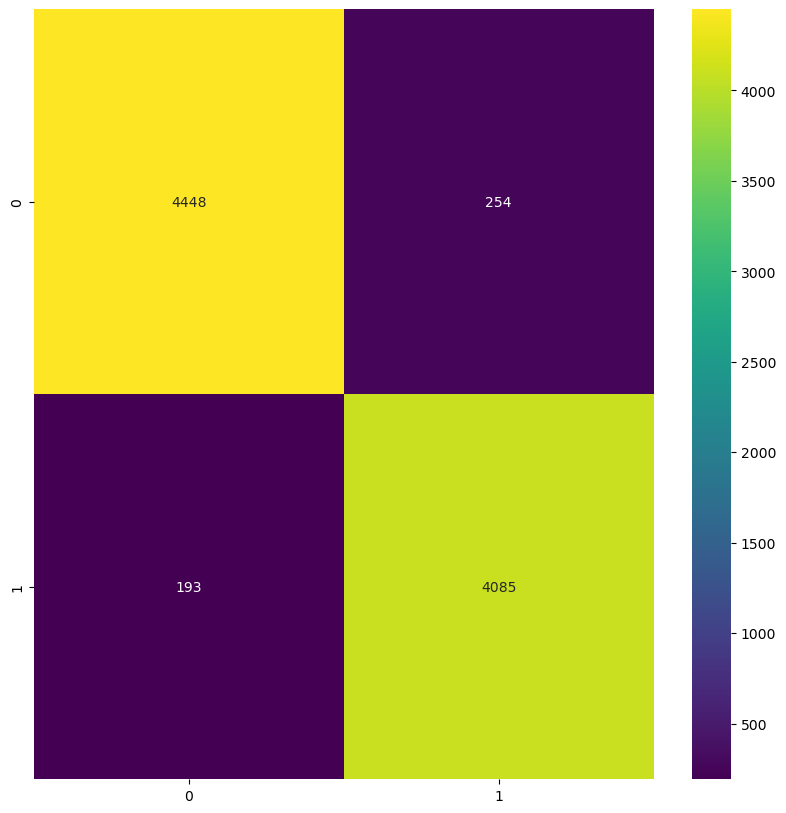

In [27]:
cm = confusion_matrix(list(y_test), predicted_value)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')

In [28]:
'''This code creates a confusion matrix using confusion_matrix() to evaluate the performance of the model. The confusion matrix is then visualized using a heatmap plot created by sns.heatmap().'''

'This code creates a confusion matrix using confusion_matrix() to evaluate the performance of the model. The confusion matrix is then visualized using a heatmap plot created by sns.heatmap().'

# Lets Check if the Content of the News is enough to predict if the news if fake or not? Lets us see in the following analysis

In [29]:
df.head()

,title,text,subject,date,target,original,clean_title,clean_joined_title
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,PoliticsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t...","[u.s., budget, fight, looms, republicans, flip...",u.s. budget fight looms republicans flip fisca...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,PoliticsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...,"[u.s., military, accept, transgender, recruits...",u.s. military accept transgender recruits mond...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,PoliticsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, u.s., republican, senator, 'let, mr.,...",senior u.s. republican senator 'let mr. muelle...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,PoliticsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...,"[fbi, russia, probe, helped, australian, diplo...",fbi russia probe helped australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,PoliticsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, 'much,...",trump wants postal service charge 'much amazon...


In [30]:
df['clean_text'] = df['text'].apply(preprocess)
df['clean_joined_text']=df['clean_text'].apply(lambda x:" ".join(x))

In [31]:
'''In this code, the text column is preprocessed using the preprocess function. The cleaned tokens are stored in a new column called 'clean_text'.
Then, the cleaned tokens are joined back into a single string separated by spaces and stored in a new column called 'clean_joined_text'.'''

"In this code, the text column is preprocessed using the preprocess function. The cleaned tokens are stored in a new column called 'clean_text'.\nThen, the cleaned tokens are joined back into a single string separated by spaces and stored in a new column called 'clean_joined_text'."

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.clean_joined_text, df.target, test_size = 0.2,random_state=2)
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)
model = LogisticRegression(C=2.5)
model.fit(X_vec_train, y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.9972045456669588


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [33]:
'''This code prepares the data for classification using the content of the news articles. It splits the cleaned joined text and target values into training and test sets. 
Then, a CountVectorizer object, vec_train, is created and fitted on the training data. The training and test data are transformed into vectors using the same vectorizer.
A logistic regression model is trained on the training data and predicts the target values for the test data. The accuracy of the predictions is evaluated using ROC AUC score and printed.'''

'This code prepares the data for classification using the content of the news articles. It splits the cleaned joined text and target values into training and test sets. \nThen, a CountVectorizer object, vec_train, is created and fitted on the training data. The training and test data are transformed into vectors using the same vectorizer.\nA logistic regression model is trained on the training data and predicts the target values for the test data. The accuracy of the predictions is evaluated using ROC AUC score and printed.'

<AxesSubplot:>

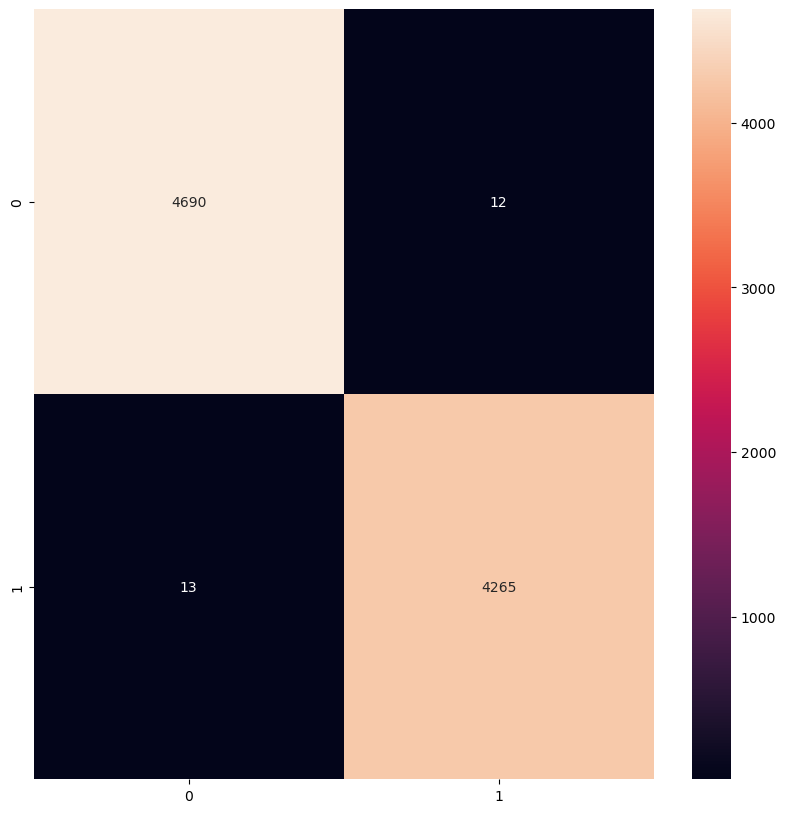

In [34]:
prediction = []
for i in range(len(predicted_value)):
    if predicted_value[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g')

In [35]:
'''This code converts the predicted values into binary predictions based on a threshold of 0.5. Predicted values greater than 0.5 are assigned as 1 (true) and values less than or equal to 0.5 are assigned as 0 (fake). Then, a confusion matrix is created using confusion_matrix() to evaluate the performance of the model. The confusion matrix is visualized using a heatmap plot.'''

'This code converts the predicted values into binary predictions based on a threshold of 0.5. Predicted values greater than 0.5 are assigned as 1 (true) and values less than or equal to 0.5 are assigned as 0 (fake). Then, a confusion matrix is created using confusion_matrix() to evaluate the performance of the model. The confusion matrix is visualized using a heatmap plot.'

#### We have been succesfully able to reach the target for classifying a News- and are able to identify if this is a True or Fake. However would like to highligh ton a few points as mentioned below:

#### Its not much feasible to predict the news just from its title. "Titles are misleading!!"
#### A much better Idea was obtained when we considered the article context for the News. The accuracy percentages shot up from 95% to 99+%. Drastic Improvement it is!
#### Considering both the title and the context, we have been able to reach the highest percentages of accuracy. I shall be working on to implement further models that would give even better results.